In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data cleaning
sheets_dict = pd.read_excel("Data_for_project.xlsx", sheet_name=None)

# Access each DataFrame using the sheet name as key
df_aus = sheets_dict['AUD']
df_cad = sheets_dict['CAD']
df_chf = sheets_dict['CHF']
df_usd = sheets_dict['USD']

def clean_df(df):
    df.columns = df.iloc[2]
    df = df.drop(df.index[:3])
    df = df.drop(df.index[:2])
    df = df.rename(columns={df.columns[0]: 'Timestamp'}) 
    return df



In [3]:
df_aus = clean_df(df_aus)
df_cad = clean_df(df_cad)
df_chf = clean_df(df_chf)
df_usd = clean_df(df_usd)
df_chf = df_chf.loc[:,~df_chf.columns.duplicated()].copy()

In [4]:
df_aus_10y = df_aus.loc[:, ['Timestamp', df_aus.columns[-1]]]
df_cad_10y = df_cad.loc[:, ['Timestamp', df_cad.columns[-1]]]
df_chf_10y = df_chf.loc[:, ['Timestamp', df_chf.columns[-1]]]
df_usd_10y = df_usd.loc[:, ['Timestamp', df_usd.columns[-1]]]

In [10]:
df_usd_10y

2,Timestamp,C08210Y Index
5,2000-01-03 00:00:00,6.61
6,2000-01-04 00:00:00,6.5
7,2000-01-05 00:00:00,6.61
8,2000-01-06 00:00:00,6.54
9,2000-01-07 00:00:00,6.53
...,...,...
6327,2024-03-27 00:00:00,4.0317
6328,2024-03-28 00:00:00,4.0317
6329,2024-03-29 00:00:00,4.0317
6330,2024-04-01 00:00:00,4.0317


In [6]:
df_aus_10y['aud_irs'] = df_aus['ADSWAP10 Curncy']
df_aus_10y['aud_bs'] = df_aus['ADBS10 Curncy'] / 100
df_aus_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_aus_10y['aud_rho'] = df_aus_10y['aud_irs'] + df_aus_10y['aud_bs'] - df_aus_10y['usd_irs']

In [7]:
df_cad_10y['cad_irs'] = df_cad['CDSW10 Curncy']
df_cad_10y['cad_bs'] = df_cad['CDBS10 Curncy'] / 100
df_cad_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_cad_10y['cad_rho'] = df_cad_10y['cad_irs'] + df_cad_10y['cad_bs'] - df_cad_10y['usd_irs']

In [8]:
df_chf_10y['chf_irs'] = df_chf['SFSW10 Curncy']
df_chf_10y['chf_bs'] = df_chf['SFBS10 Curncy'] / 100
df_chf_10y['usd_irs'] = df_usd['USSW10 Curncy']
df_chf_10y['chf_rho'] = df_chf_10y['chf_irs'] + df_chf_10y['chf_bs'] - df_chf_10y['usd_irs']

In [12]:
df_chf_10y

2,Timestamp,C25610Y Index,chf_irs,chf_bs,usd_irs,chf_rho
5,2000-01-03 00:00:00,3.58,NaN,NaN,NaN,NaN
6,2000-01-04 00:00:00,3.66,NaN,NaN,NaN,NaN
7,2000-01-05 00:00:00,3.66,NaN,NaN,NaN,NaN
8,2000-01-06 00:00:00,3.7,NaN,NaN,NaN,NaN
9,2000-01-07 00:00:00,3.67,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
6327,2024-03-27 00:00:00,0.8584,0.1675,-0.1825,3.8605,-3.8755
6328,2024-03-28 00:00:00,0.8584,0.1675,-0.1825,3.8605,-3.8755
6329,2024-03-29 00:00:00,0.8584,0.1675,-0.1825,3.8605,-3.8755
6330,2024-04-01 00:00:00,0.8584,0.1675,-0.1825,3.8605,-3.8755


In [13]:
df_aus_10y['us_treasury_premium_aus'] = df_aus_10y['C12710Y Index'] - df_aus_10y['aud_rho'] - df_usd_10y['C08210Y Index']
df_cad_10y['us_treasury_premium_cad'] = df_cad_10y['C10110Y Index'] - df_cad_10y['cad_rho'] - df_usd_10y['C08210Y Index']
df_chf_10y['us_treasury_premium_chf'] = df_chf_10y['C25610Y Index'] - df_chf_10y['chf_rho'] - df_usd_10y['C08210Y Index']

In [16]:
df_usd_10y['ustp_mean'] = 100*(df_aus_10y['us_treasury_premium_aus']+df_cad_10y['us_treasury_premium_cad']+df_chf_10y['us_treasury_premium_chf'])/3

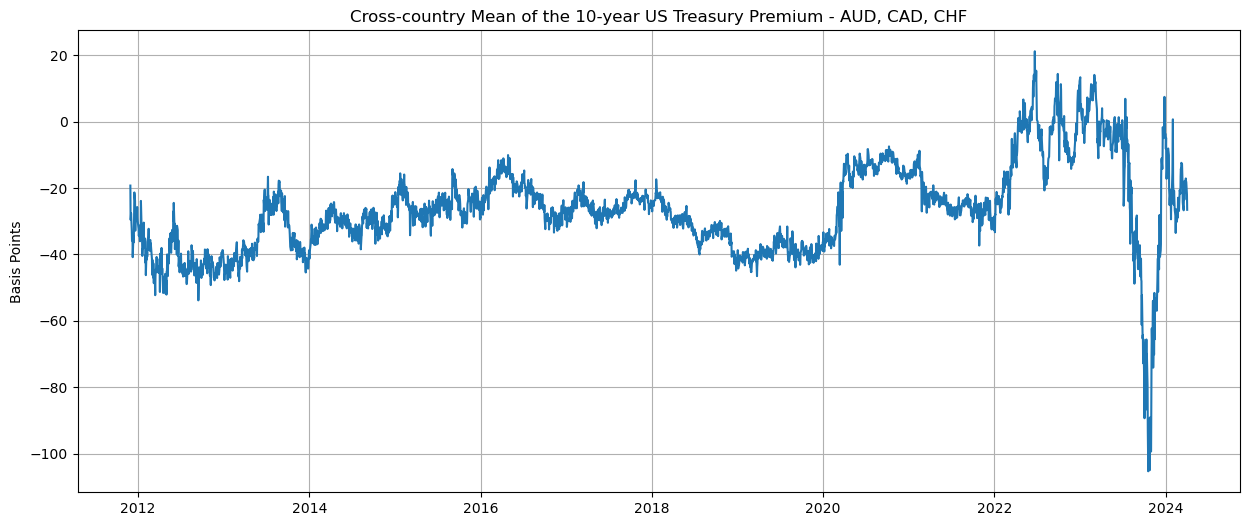

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(df_usd_10y['Timestamp'], df_usd_10y['ustp_mean'])
plt.ylabel('Basis Points')
plt.title("Cross-country Mean of the 10-year US Treasury Premium - AUD, CAD, CHF")
plt.grid(True)


In [ ]:
# Cross-country Mean 10 year US treasury premium: df_usd_10y['ustp_mean']